In [37]:
import sklearn, pickle
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [3]:
data = pickle.load(open('dataset_2017-10-16T11:34:21.440581.pkl','r'))

In [4]:
data

,Labels,Names,A_row,A_group,A_atomic_mass,A_atomic_radius,A_electronegativity,B_row,B_group,B_atomic_mass,...,B_atomic_radius/B_electronegativity,B_atomic_radius/C_atomic_mass,B_atomic_radius/C_atomic_radius,B_atomic_radius/C_electronegativity,B_electronegativity/C_atomic_mass,B_electronegativity/C_atomic_radius,B_electronegativity/C_electronegativity,C_atomic_mass/C_atomic_radius,C_atomic_mass/C_electronegativity,C_atomic_radius/C_electronegativity
0,Unknown,AgAc2O4,5,11,107.868200,160.0,1.93,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
2,Unknown,AsAc2O4,4,15,74.921595,115.0,2.18,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
3,Unknown,AuAc2O4,6,11,196.966569,135.0,2.40,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
4,Unknown,BAc2O4,2,13,10.810000,85.0,2.04,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
5,Unknown,BaAc2O4,6,2,137.327000,215.0,0.89,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
6,Unknown,BeAc2O4,2,2,9.012183,105.0,1.57,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
7,Unknown,CAc2O4,2,14,12.011000,70.0,2.55,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
8,Unknown,CaAc2O4,4,2,40.078000,180.0,1.00,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
9,Unknown,CdAc2O4,5,12,112.414000,155.0,1.69,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860
10,Unknown,CeAc2O4,8,4,140.116000,185.0,1.12,9,3,227.000,...,177.272727,12.188262,3.250000,56.686047,0.068754,0.018333,0.319767,0.266650,4.650872,17.441860


In [10]:
stable_idxs = data['Labels'] == 'Stable'
unstable_idxs = data['Labels'] == 'Unstable'

In [53]:
stable_data = data[stable_idxs].iloc[:,2:]
unstable_data = data[unstable_idxs].iloc[:,2:]
labeled_data = np.vstack((stable_data,unstable_data))

In [54]:
mean = np.mean(labeled_data,axis=0)
std = np.std(labeled_data,axis=0)
labeled_data = (labeled_data-mean)/std

In [55]:
pca_ = PCA(n_components=2)
pca_fit = pca_.fit(labeled_data)

In [56]:
transformed_data = pca_fit.transform(labeled_data)

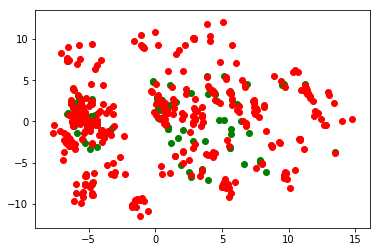

In [57]:
import matplotlib.pyplot as plt
plt.scatter(transformed_data[:169,0],transformed_data[:169,1],c='g')
plt.scatter(transformed_data[169:,0],transformed_data[169:,1],c='r')
plt.show()

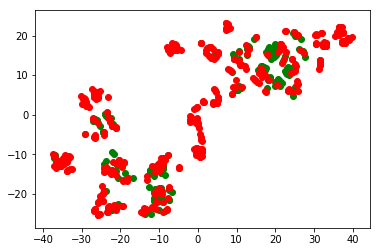

In [58]:
tsne_data = TSNE(n_components=2).fit_transform(labeled_data)
plt.scatter(tsne_data[:169,0],tsne_data[:169,1],c='g')
plt.scatter(tsne_data[169:,0],tsne_data[169:,1],c='r')
plt.show()

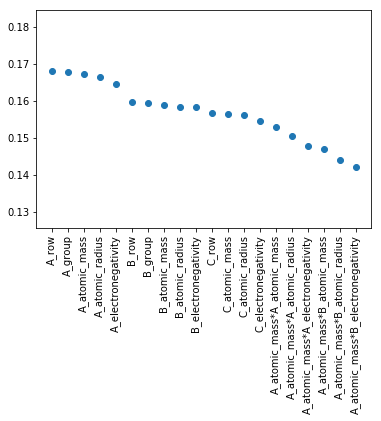

In [78]:
comps = pca_fit.components_
atts = data.columns[2:]
c1 = comps[0,:]
c1 = c1[np.argsort(c1)[::-1]]
c2 = comps[0,:]
c2 = c2[np.argsort(c2)[::-1]]

plt.scatter(range(20),c1[:20])
plt.xticks(range(20),atts[np.argsort(c1)[::-1]][:20],rotation='vertical')
plt.show()

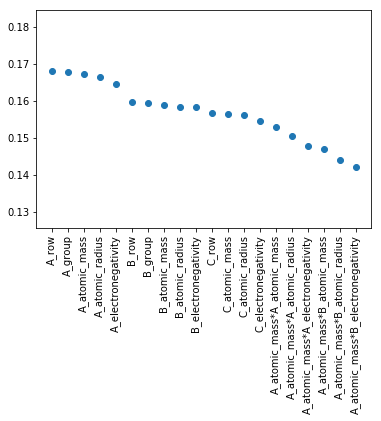

In [79]:
plt.scatter(range(20),c2[:20])
plt.xticks(range(20),atts[np.argsort(c2)[::-1]][:20],rotation='vertical')
plt.show()